<h1><center>Machine Learning on Automobile CO$_2$ Emissions</center><h1> 

## 1. Introduction

### 1.1 Fuel consumption testing & determination of CO2 emissions
It would be difficult to drive every model of new vehicle on the road to measure fuel consumption and CO2 emission. And it would be impossible to get repeatable results that way because so many factors – road conditions and weather, to name just two – can affect a vehicle’s performance.

That is why vehicle manufacturers use standard, controlled laboratory testing and analytical procedures to generate the fuel consumption data that appear on the **EnerGuide label** for vehicles.

Environment and Climate Change Canada collects the data from vehicle manufacturers. Natural Resources Canada puts the data and other information together and publish the Fuel Consumption & CO2 emissions. We will be using the dataset published by Natural Resources Canada.

###  1.2 Data Collection


Manufacturers use the 2-cycle testing procedure, by testing vehicles under simulated city and highway conditions to find out how much fuel they use and what will be the CO2 emissions.

**The city test** simulates urban driving in stop-and-go traffic with an average speed of 34 km/h and a top speed of 90 km/h. The test runs for approximately 31 minutes and includes 23 stops. The test begins from a cold engine start, which is similar to starting a vehicle after it has been parked overnight during the summer. The final phase of the test repeats the first eight minutes of the cycle but with a hot engine start. This simulates restarting a vehicle after it has been warmed up, driven and then stopped for a short time. Over five minutes of test time are spent idling, to represent waiting at traffic lights.

The City test parameters are as under;

|Parameter Name||Values|
|---------||-----------|
|Test Cell Temperature:|| 20°-30°C|
|Total Time:|| 31 minutes, 14 seconds|
|Distance: ||17.8 km|
|Top Speed: ||90 km/h|
|Average Speed:|| 34 km/h|
|Maximum Acceleration: ||5.3 km/h per second|
|Number of Stops:|| 23|
|Idling Time: ||18% of total time|
|Engine Start:|| Cold|

**The highway test** simulates a mixture of open highway and rural road driving, with an average speed of 78 km/h and a top speed of 97 km/h. The test runs for approximately 13 minutes and does not include any stops. The test begins from a hot engine start.

The Highway test parameters are as under;

|Parameter Name||Variable|
|--------------||---------|
|Test Cell Temperature:||20°-30°C|
|Total Time:||12 minutes, 45 seconds|
|Distance:||16.5 km|
|Top Speed:||97 km/h|
|Average Speed:||78 km/h|
|Maximum Acceleration:||5.2 km/h per second|
|Number of Stops:||0|
|Idling Time:||0|
|Engine Start:||Warm|

## 2. Problem Statement

Nowadays, one of the biggest challenges is to reduce greenhouse gases (GHG) from the transport industry. In particular, the road transport sector accounts for about 80% of the whole energy demand required by transportation and, due to its reliance on fossil fuels, represents one of the most important sources of Green House Gases emissions in the world.

Here we have the dataset of new light duty vehicles for retail sale in Canada, where we have different Car models and their corresponding **CO2 emissions** when drove over Highway as well as on City roads. 

Using this Dataset let us try to find out the following;
1. What are the variables that directly influence the CO2 emissions? 
2. Develop an equation which gives the relationship between the CO2 emissions and the variables that influence it?


## 3. Selecting the important Python Libraries

In [6]:
import numpy as np
np.set_printoptions(precision=4)      # To display values only upto four decimal places. 

import pandas as pd
pd.set_option('mode.chained_assignment', None)       # To suppress pandas warnings.
pd.set_option('display.max_colwidth', None)          # To display all the data in the columns.
pd.set_option('display.max_columns', None)           # To display all the columns.

import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 8))     # Set the default figure size of plots.
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')     # To suppress all the warnings in the notebook.

import seaborn as sns

## 4. Data Loading and Description

### 4.1 Data Loading

We have downloaded the dataset from the website https://www.canada.ca/en.html.

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Data/FuelConsumptionCo2.csv')
df.head(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [8]:
df.shape

(1067, 13)

### 4.2 Description of the data

From the above **```df.head()```** function we have observed that there are 13 columns.


|Column Name||Description|
|------------||----------|
|MODEL YEAR|| The year during which the car model was manufactured|
|MAKE||Name of the Car Manufacturer. Eg., DODGE, BMW, AUDI, etc|
|MODEL||Name of the Car Model eg., 4WD means 4 Wheel Drive|
|VEHICLE CLASS||The type of Car;SUV,Compact, Two seater etc.| 
|ENGINESIZE||The Capacity of the engine. It is measured as total volume of the cylinders in the engine. It is measured in cc|
|CYLINDERS||It generally denotes how many cylinders a vehicle has|
|TRANSMISSION||It represents the type of gear system in Car. A stands for Automatic (A4, A5 etc) and M stands for Manual (M5, M7 etc)|
|FUEL TYPE||It represents the type of fuel used in the car. The common types of fuel are X = Regular gasoline; Z = Premium gasoline; D = Diesel; E = E85;| 
|FUELCONSUMPTION_CITY||It is the Fuel consumed during City test. Its unit is Liters/100Km|
|FUELCONSUMPTION_HWY||It is the Fuel consumed during Highway test. Its unit is Liters/100Km|
|FUELCONSUMPTION_COMB||This reflects 55% of fuel consumption during City test + 45% of fuel consumption during Highway test|
|FUELCONSUMPTION_COMB_MPG||It is the combined Fuel consumption in terms of Miles per Gallon. mpg=282.48/FUELCONSUMPTION_COMB|  
|CO2EMISSIONS||It is the Carbon-di-oxide emissions measured from tailpipe. Its unit is g/Km. This is our target variable|

## 5. Exploratory Data Analysis

Now we have the dataset loaded and ready to use. We will now start with Exploratory data Analysis whereby we explore all the columns and also their relationship with other columns

### Basic understanding of columns and dropping unwanted columns

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


Observations from ```.info()``` are as under;
- 1.There are no missing values in the dataset
- 2.We have 13 columns and 1067 rows of data.
- 3.Out of the 13 columns, 5 columns have objects and balance 8 columns are numerical

Checking the flow of the 8 numerical columns using ```.describe()``` function as under;



In [11]:
df['CYLINDERS'].value_counts()

4     420
6     356
8     252
12     17
10      9
5       9
3       4
Name: CYLINDERS, dtype: int64

In [12]:
df.describe(include='all')

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067,1067,1067,1067.000000,1067.000000,1067,1067,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
unique,NaN,39,663,16,NaN,NaN,22,4,NaN,NaN,NaN,NaN,NaN
top,NaN,FORD,F150 FFV 4X4,MID-SIZE,NaN,NaN,A6,X,NaN,NaN,NaN,NaN,NaN
freq,NaN,90,8,178,NaN,NaN,222,514,NaN,NaN,NaN,NaN,NaN
mean,2014.0,NaN,NaN,NaN,3.346298,5.794752,NaN,NaN,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,NaN,NaN,NaN,1.415895,1.797447,NaN,NaN,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,NaN,NaN,NaN,1.000000,3.000000,NaN,NaN,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,NaN,NaN,NaN,2.000000,4.000000,NaN,NaN,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,NaN,NaN,NaN,3.400000,6.000000,NaN,NaN,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,NaN,NaN,NaN,4.300000,8.000000,NaN,NaN,15.550000,10.850000,13.350000,31.000000,294.000000


Observations from ```.describe()``` are as under;

- All the car models are manufactured during the year 2014. So **MODELYEAR** column is no use for us and hence we need to drop it.
- **MODEL** column has 663 unique entries and we can drop this column as this will not be any use for developing model.
- We will study the **VEHICLE CLASS, TRANSMISSION & FUELTYPE**  columns during EDA and decide whether to drop it.
- **ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY, FUELCONSUMPTION_HWY, FUELCONSUMPTION_COMB, FUELCONSUMPTION_COMB_MPG** look to be normally distributed
- We will also drop **FUELCONSUMPTION_COMB_MPG** column as it is derived from **FUELCONSUMPTION_COMB** column.

In [13]:
df.drop(columns=['MODELYEAR','FUELCONSUMPTION_COMB_MPG','MODEL'], axis=0, inplace=True)

In [14]:
df.head()

,MAKE,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,ACURA,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,196
1,ACURA,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,221
2,ACURA,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,136
3,ACURA,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,255
4,ACURA,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,244


In [15]:
df.shape

(1067, 10)

In [16]:
df=df.drop_duplicates()
df.reset_index()

,index,MAKE,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,0,ACURA,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,196
1,1,ACURA,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,221
2,2,ACURA,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,136
3,3,ACURA,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,255
4,4,ACURA,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,244
...,...,...,...,...,...,...,...,...,...,...,...
947,1061,VOLVO,SUV - SMALL,3.2,6,AS6,X,13.0,8.9,11.2,258
948,1062,VOLVO,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,271
949,1063,VOLVO,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,264
950,1065,VOLVO,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,260


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 952 entries, 0 to 1066
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MAKE                  952 non-null    object 
 1   VEHICLECLASS          952 non-null    object 
 2   ENGINESIZE            952 non-null    float64
 3   CYLINDERS             952 non-null    int64  
 4   TRANSMISSION          952 non-null    object 
 5   FUELTYPE              952 non-null    object 
 6   FUELCONSUMPTION_CITY  952 non-null    float64
 7   FUELCONSUMPTION_HWY   952 non-null    float64
 8   FUELCONSUMPTION_COMB  952 non-null    float64
 9   CO2EMISSIONS          952 non-null    int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 81.8+ KB


### Understanding the distribution of each columns

In [1]:
len(df['MAKE'].value_counts()) #checking the number of varities of car brands

NameError: name 'df' is not defined

In [19]:
df['MAKE'].value_counts()

FORD             90
CHEVROLET        79
MERCEDES-BENZ    55
TOYOTA           48
BMW              47
GMC              42
VOLKSWAGEN       42
AUDI             41
DODGE            37
PORSCHE          34
KIA              33
NISSAN           33
CADILLAC         30
MAZDA            25
HYUNDAI          24
JEEP             24
SUBARU           23
LEXUS            21
HONDA            21
INFINITI         21
MINI             18
CHRYSLER         17
MITSUBISHI       16
BUICK            15
JAGUAR           15
LAND ROVER       13
RAM              13
ACURA            12
LINCOLN          11
VOLVO            10
SCION             9
BENTLEY           7
FIAT              6
ROLLS-ROYCE       6
MASERATI          5
ASTON MARTIN      4
LAMBORGHINI       3
SMART             1
SRT               1
Name: MAKE, dtype: int64

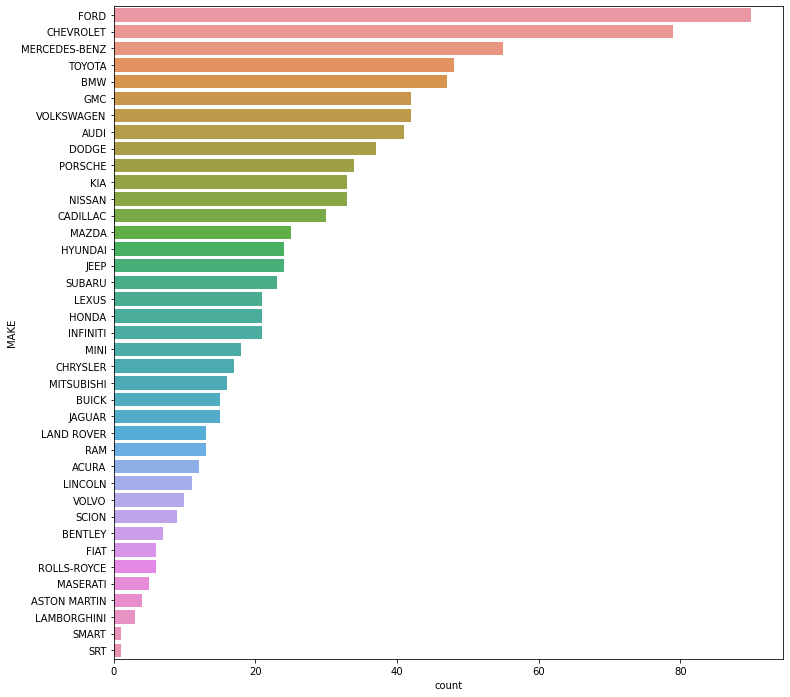

In [20]:
plt.figure(figsize=(12,12))
sns.countplot(y='MAKE',data=df,order=df['MAKE'].value_counts().index);

Out of the 39 varieties of cars, **FORD, CHEVROLET, BMW & MERCEDES-BENZ** are very common. 9.5% of the dataset contains the data only from **FORD** Cars. 

In [22]:
B=df[['MAKE','CO2EMISSIONS']].groupby(by='MAKE').mean().sort_values(by='CO2EMISSIONS',ascending= False) 
# calculating the mean CO2 emissions for each brand
B

,CO2EMISSIONS
MAKE,
LAMBORGHINI,394.000000
SRT,389.000000
ROLLS-ROYCE,383.166667
BENTLEY,356.000000
ASTON MARTIN,352.500000
GMC,330.261905
MASERATI,325.200000
LAND ROVER,308.692308
RAM,291.230769


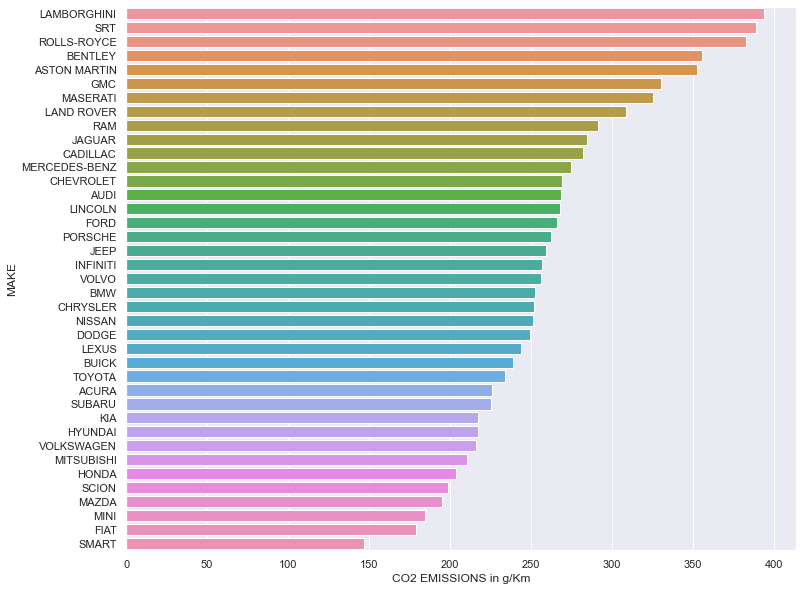

In [23]:
plt.figure(figsize=(12,10))
sns.set(font_scale = 1)
sns.barplot(y=B.index, x=B['CO2EMISSIONS'],)
plt.xlabel('CO2 EMISSIONS in g/Km');

The top 10 car brands of Canada with highest amount of CO2 emissions are as under;

- LAMBORGHINI
- SRT
- ROLLS-ROYCE
- BENTLEY
- ASTON MARTIN
- GMC
- MASERATI
- LAND ROVER
- RAM
- JAGUAR

In [24]:
df[['MAKE','CO2EMISSIONS']].groupby(by='MAKE').mean().sort_values(by='CO2EMISSIONS',ascending= False).tail(5)
# calculating the mean CO2 emissions for each brand

plt.figure(figsize=(12,10))
sns.set(font_scale = 1)
sns.barplot(y=B.index, x=B['CO2EMISSIONS'],)
plt.xlabel('CO2 EMISSIONS in g/Km');

,CO2EMISSIONS
MAKE,
SCION,198.888889
MAZDA,195.400000
MINI,184.666667
FIAT,179.333333
SMART,147.000000


Car Brands such as **SCION, MAZDA, MINI, FIAT & SMART** are better options as their CO2 emissions are lower.

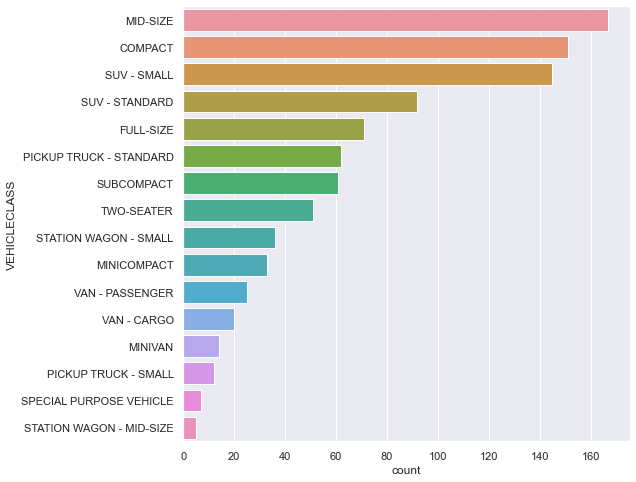

In [26]:
plt.figure(figsize=(8,8))
sns.countplot(y='VEHICLECLASS',data=df,order=df['VEHICLECLASS'].value_counts().index);

From the above count plot and the table, we understand that out of 952 rows of data, the data of 463 columns are only for smaller economical cars 

In [27]:
D= df[['VEHICLECLASS','CO2EMISSIONS']].groupby(by='VEHICLECLASS').mean().sort_values(by='CO2EMISSIONS',ascending= False).head(10)
D

,CO2EMISSIONS
VEHICLECLASS,
VAN - PASSENGER,401.000000
VAN - CARGO,359.650000
PICKUP TRUCK - STANDARD,309.096774
SUV - STANDARD,307.282609
PICKUP TRUCK - SMALL,284.250000
FULL-SIZE,264.521127
TWO-SEATER,263.941176
MINIVAN,260.142857
SUBCOMPACT,253.032787


The top 10 class of cars in Canada with highest amount of CO2 emissions are given above.

The compact SUV car models are better models for controlling CO2 emissions

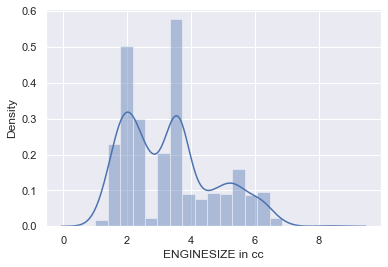

In [28]:
sns.distplot(df['ENGINESIZE'])
plt.xlabel('ENGINESIZE in cc');

From the above we noticed that the distribution of EngineSize is not 100% uniform. But let us see the behaviour with CO2

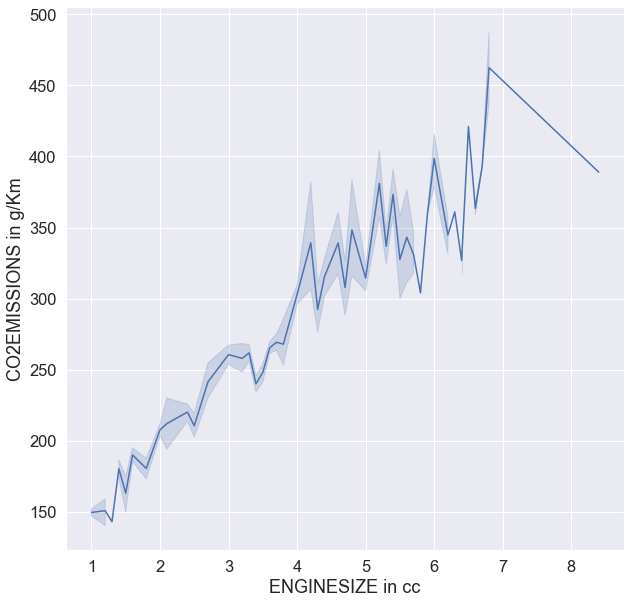

In [29]:
plt.figure(figsize=(10,10))
sns.set(font_scale = 1.5)
sns.lineplot(df['ENGINESIZE'],df['CO2EMISSIONS'])
plt.xlabel('ENGINESIZE in cc')
plt.ylabel('CO2EMISSIONS in g/Km');

From the above plot we notice that as the engine size increases, the CO2 emissions increases.

Therefore in order to reduce the CO2 emissions, we should always go for lower cc engines

In [31]:
df['CYLINDERS'].value_counts()      #To get varities of cylinders

4     381
6     329
8     210
12     14
5       9
10      6
3       3
Name: CYLINDERS, dtype: int64

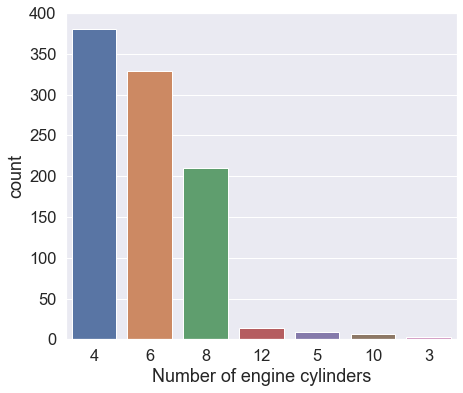

In [32]:
sns.light_palette("seagreen", as_cmap=True)
plt.figure(figsize=(7,6))
sns.set(font_scale = 1.5)
sns.countplot('CYLINDERS', data=df, order=df['CYLINDERS'].value_counts().index)
plt.xlabel('Number of engine cylinders');

Out of the 7 varieties of cylinders, 4, 6 and 8 are very common cylinder types. About 97% of the data contains only these cylinder types.

In [33]:
F=df[['CYLINDERS','CO2EMISSIONS']].groupby(by='CYLINDERS').mean().sort_values(by='CO2EMISSIONS',ascending= False).head(10)
F

,CO2EMISSIONS
CYLINDERS,
10,400.166667
12,376.500000
8,334.314286
6,261.288754
5,223.888889
4,201.406824
3,144.000000


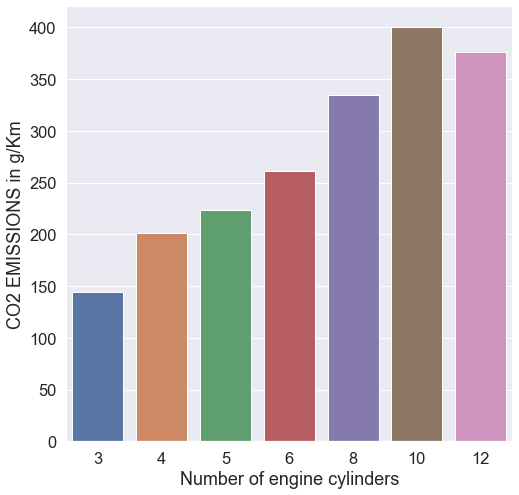

In [34]:
sns.light_palette("seagreen", as_cmap=True)
plt.figure(figsize=(8,8))
sns.barplot(x=F.index, y=F['CO2EMISSIONS'])
plt.ylabel('CO2 EMISSIONS in g/Km')
plt.xlabel('Number of engine cylinders');

From the above count plot, it is understood that the CO2 emissions increases with increase in Number of cylinders. As for 12 cylinder engine, there is drop in CO2 emissions because of very less data on 12 cylinder engines (only 12 rows of data) 

Therefore in order to have better control on emissions, we should go for more 3 or 4 cylinder engines

In [35]:
df['TRANSMISSION'].value_counts()

A6     196
AS6    184
M6     118
A8      73
AS7     72
AS8     64
AV      45
A4      43
M5      42
A5      29
AM7     24
AV6     11
A7       9
AS5      9
A9       8
M7       8
AM6      6
AV7      5
AV8      3
AS9      1
AS4      1
AM5      1
Name: TRANSMISSION, dtype: int64

We got 22 types of engine tranmissions

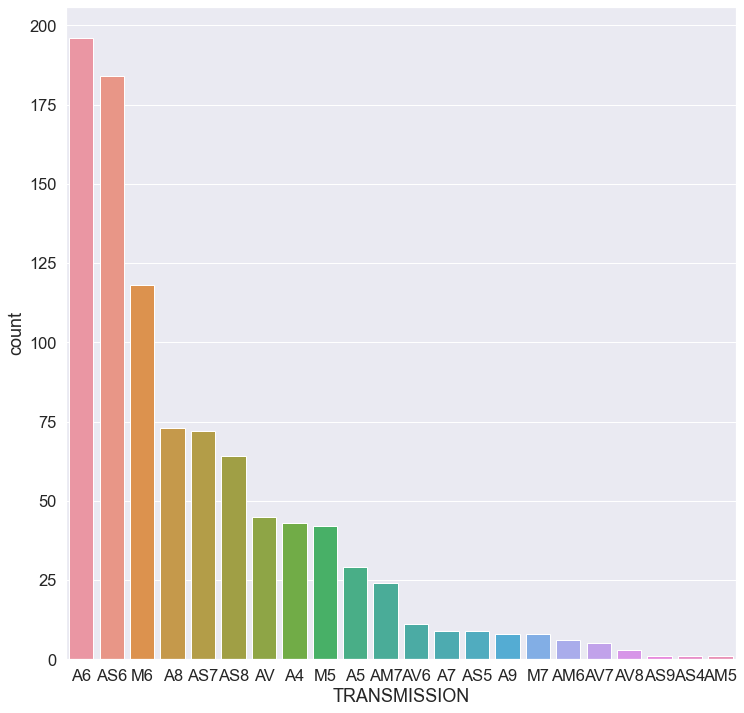

In [36]:
plt.figure(figsize=(12,12))
sns.set(font_scale = 1.5)
sns.countplot('TRANSMISSION',data=df,order=df['TRANSMISSION'].value_counts().index);

**M6, AS6 & A6** transmissions are commonly preferred compared to others

In [38]:
H=df[['TRANSMISSION','CO2EMISSIONS']].groupby(by='TRANSMISSION').mean().sort_values(by='CO2EMISSIONS',ascending= False)
H

,CO2EMISSIONS
TRANSMISSION,
A4,326.651163
A7,310.777778
A5,300.310345
AS8,287.828125
AS7,271.819444
A8,267.753425
AM7,266.750000
A6,263.928571
AS5,257.111111


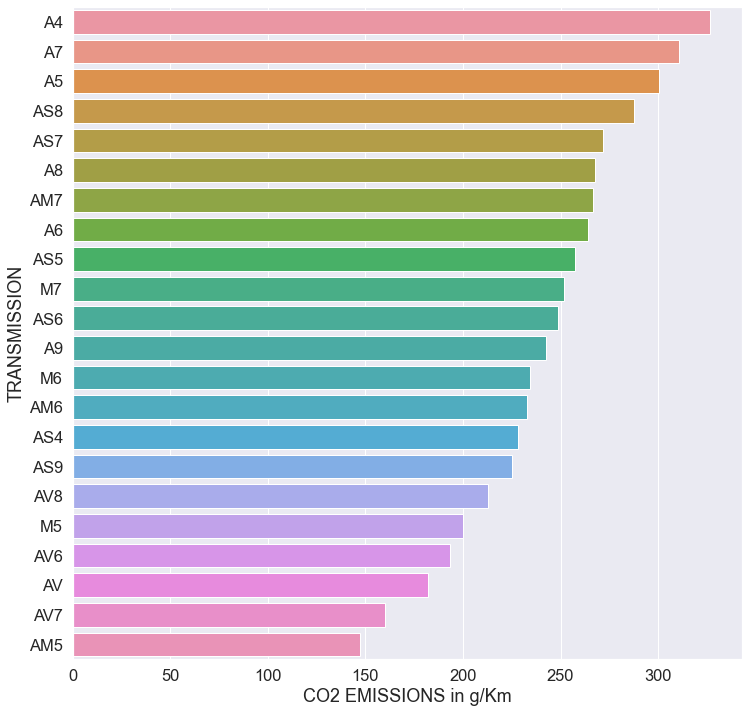

In [39]:
plt.figure(figsize=(12,12))
sns.set(font_scale = 1.5)
sns.barplot(y=H.index, x=H['CO2EMISSIONS'])
plt.xlabel('CO2 EMISSIONS in g/Km');

M6, AS6 & A6 transmissions are commonly preferred as the CO2 emissions are comparatively lower than other transmissions

In [40]:
df['FUELTYPE'].value_counts()

X    486
Z    356
E     84
D     26
Name: FUELTYPE, dtype: int64

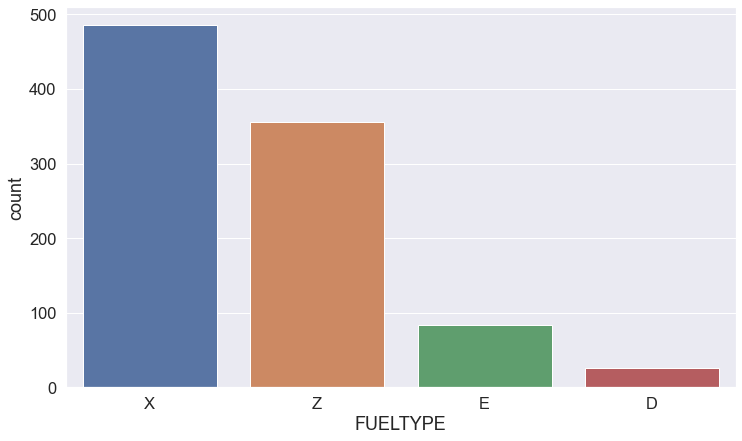

In [41]:
plt.figure(figsize=(12,7))
sns.countplot('FUELTYPE',data=df,order=df['FUELTYPE'].value_counts().index);

Fuel type  X & Z are more commonly used then E & D

In [42]:
J=df[['FUELTYPE','CO2EMISSIONS']].groupby(by='FUELTYPE').mean().sort_values(by='CO2EMISSIONS',ascending= False)
J

,CO2EMISSIONS
FUELTYPE,
E,290.404762
Z,269.168539
X,240.495885
D,227.923077


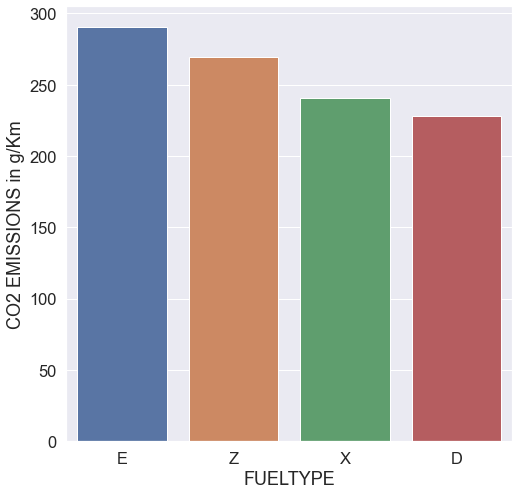

In [43]:
plt.figure(figsize=(8,8))
sns.barplot(x=J.index, y=J['CO2EMISSIONS'],)
plt.ylabel('CO2 EMISSIONS in g/Km');

Fuel type Z and X have lower CO2 emissions compared to Fuel type E. Fuel Type D has lowest emissions.

Car manufacturers must manufacturer engines with type D fuel variant

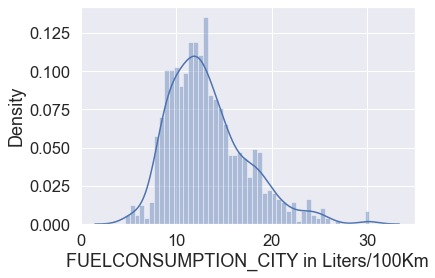

In [44]:
sns.distplot(df['FUELCONSUMPTION_CITY'], bins=50)
plt.xlabel('FUELCONSUMPTION_CITY in Liters/100Km');

FUEL CONSUNPTION CITY is almost normally distributed with slightly right skew

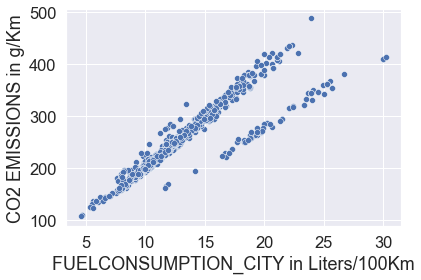

In [45]:
sns.scatterplot(df['FUELCONSUMPTION_CITY'], df['CO2EMISSIONS'])
plt.xlabel('FUELCONSUMPTION_CITY in Liters/100Km')
plt.ylabel('CO2 EMISSIONS in g/Km');

The above curve gave two distinct patterns where the isolated pattern shows same CO2 emissions with increased higher Fuel Consumption. Let us find out which **FUELTYPE** is giving this output

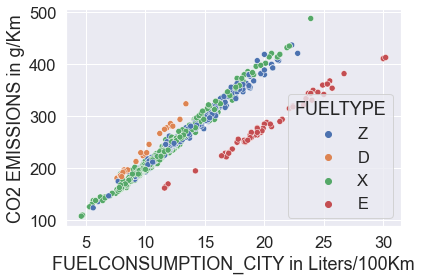

In [47]:
sns.scatterplot(df['FUELCONSUMPTION_CITY'], df['CO2EMISSIONS'], hue=df['FUELTYPE'])
plt.xlabel('FUELCONSUMPTION_CITY in Liters/100Km')
plt.ylabel('CO2 EMISSIONS in g/Km');

From the above plot it is clear on why **E type Fuel** is not commonly used as the fuel consumption is more compared to other fuels 

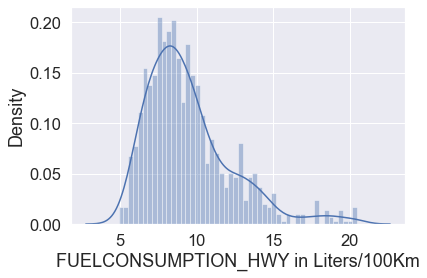

In [48]:
sns.distplot(df['FUELCONSUMPTION_HWY'], bins=50)
plt.xlabel('FUELCONSUMPTION_HWY in Liters/100Km');

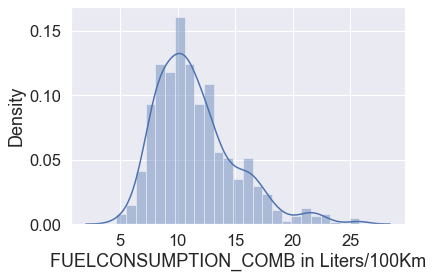

In [51]:
sns.distplot(df['FUELCONSUMPTION_COMB'])
plt.xlabel('FUELCONSUMPTION_COMB in Liters/100Km');

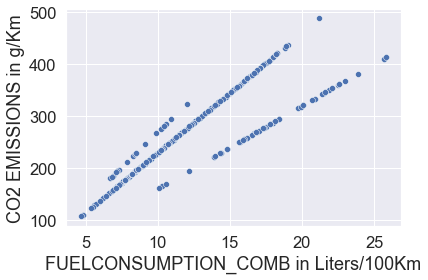

In [52]:
sns.scatterplot(df['FUELCONSUMPTION_COMB'],df['CO2EMISSIONS'])
plt.xlabel('FUELCONSUMPTION_COMB in Liters/100Km')
plt.ylabel('CO2 EMISSIONS in g/Km');

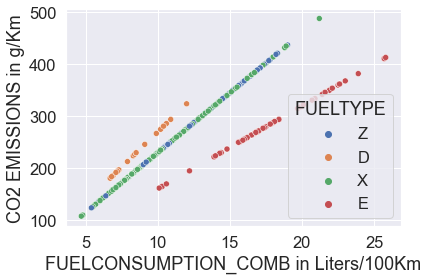

In [53]:
sns.scatterplot(df['FUELCONSUMPTION_COMB'],df['CO2EMISSIONS'], hue=df['FUELTYPE'])
plt.xlabel('FUELCONSUMPTION_COMB in Liters/100Km')
plt.ylabel('CO2 EMISSIONS in g/Km');

Since FUELCONSUMPTION_COMB is derived from FUELCONSUMPTION_CITY & FUELCONSUMPTION_HWY, it is best to delete it as it is derived column

Let us delete FUELCONSMPTION_CTY & FUELCONSMPTION_HWY and keep only FUELCONSUMPTION_COMB. 

In [54]:
df.drop(columns=['FUELCONSUMPTION_COMB'], axis=0, inplace= True)
df.head()

,MAKE,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,CO2EMISSIONS
0,ACURA,COMPACT,2.0,4,AS5,Z,9.9,6.7,196
1,ACURA,COMPACT,2.4,4,M6,Z,11.2,7.7,221
2,ACURA,COMPACT,1.5,4,AV7,Z,6.0,5.8,136
3,ACURA,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,255
4,ACURA,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,244


In [55]:
df.shape

(952, 9)

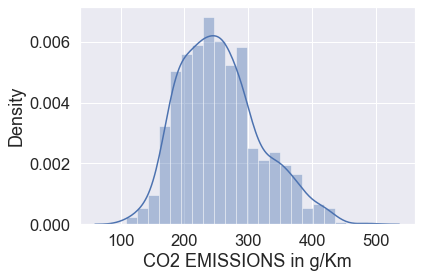

In [56]:
sns.distplot(df['CO2EMISSIONS'])
plt.xlabel('CO2 EMISSIONS in g/Km');

CO2EMISSIONS column is normally distributed

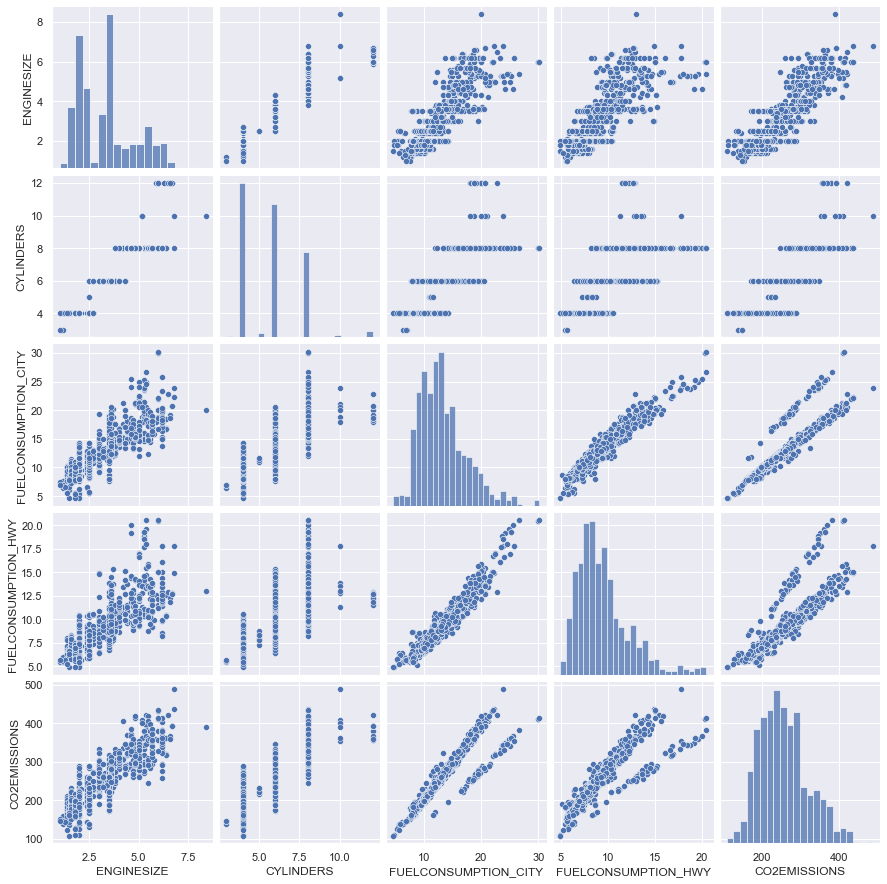

In [57]:
sns.light_palette("seagreen", as_cmap=True)
sns.set(font_scale = 1)
sns.pairplot(data=df);

In [58]:
df.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,CO2EMISSIONS
ENGINESIZE,1.000000,0.934377,0.825390,0.772854,0.869835
CYLINDERS,0.934377,1.000000,0.788633,0.719775,0.843533
FUELCONSUMPTION_CITY,0.825390,0.788633,1.000000,0.965839,0.897429
FUELCONSUMPTION_HWY,0.772854,0.719775,0.965839,1.000000,0.860853
CO2EMISSIONS,0.869835,0.843533,0.897429,0.860853,1.000000


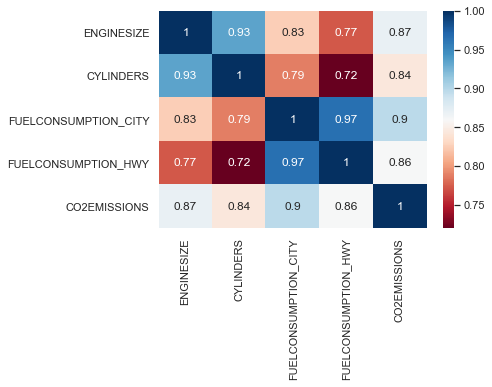

In [59]:
sns.heatmap(df.corr(), annot=True, cmap='RdBu');

#### 5.4.12 Conclusion from EDA

#### From EDA we have the following conclusions;
   - **Engine size** has linear relationship with **CO2 emissions.**
   - As the Number of **Engine Cylinder** increases, the **CO2 Emission** increases
   - Fuel Type **E** has high fuel consumption but same **CO2 Emissions**
   - The Target Variable **CO2 EMISSIONS** is normally distributed.
   - **ENGINE SIZE, CYLINDERS, FUELCONSUMPTION_CITY, FUELCONSUMPTION_HWY, & CO2EMISSIONS** are highly co-related with each other
   

In [60]:
df.head()

,MAKE,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,CO2EMISSIONS
0,ACURA,COMPACT,2.0,4,AS5,Z,9.9,6.7,196
1,ACURA,COMPACT,2.4,4,M6,Z,11.2,7.7,221
2,ACURA,COMPACT,1.5,4,AV7,Z,6.0,5.8,136
3,ACURA,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,255
4,ACURA,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,244


## 6. Linear Regression

Now we will move forward and design different Machine Learning models for the dataset and decide what will be the best model for accurately predicting the CO2 emissions 

Before we move forward with applying Machine learning algorithms, we need to first convert the categorical object column **FUELTYPE** into categorical numerical column using ```getdummies()``` function

In [61]:
df=pd.get_dummies(data=df, columns=['FUELTYPE'],drop_first=True )

In [62]:
df.head()

,MAKE,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,CO2EMISSIONS,FUELTYPE_E,FUELTYPE_X,FUELTYPE_Z
0,ACURA,COMPACT,2.0,4,AS5,9.9,6.7,196,0,0,1
1,ACURA,COMPACT,2.4,4,M6,11.2,7.7,221,0,0,1
2,ACURA,COMPACT,1.5,4,AV7,6.0,5.8,136,0,0,1
3,ACURA,SUV - SMALL,3.5,6,AS6,12.7,9.1,255,0,0,1
4,ACURA,SUV - SMALL,3.5,6,AS6,12.1,8.7,244,0,0,1


### 6.2 LINEAR REGRESSION ASSUMPTIONS

**1. The Target Variable must be normally distributed**

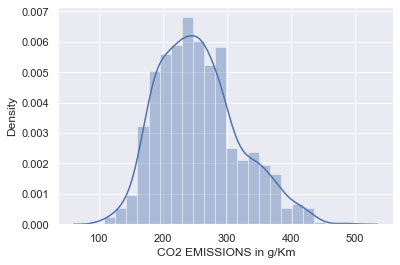

In [63]:
sns.distplot(df['CO2EMISSIONS'])
plt.xlabel('CO2 EMISSIONS in g/Km');

From the above plot it is clear that the target variable ```df['CO2EMISSIONS']``` is normally distributed

**Explanatory variables must not be co-related with each other**

We have the independent feature variables as : ```['MAKE', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS', 'TRANSMISSION','FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY','FUELTYPE_E', 'FUELTYPE_X', 'FUELTYPE_Z']```

Let us see the correlation matrix and drop the variables which are having co-relation, |r|>0.8

In [64]:
columns= ['MAKE', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS', 'TRANSMISSION','FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY','FUELTYPE_E', 'FUELTYPE_X', 'FUELTYPE_Z']
columns

['MAKE',
 'VEHICLECLASS',
 'ENGINESIZE',
 'CYLINDERS',
 'TRANSMISSION',
 'FUELCONSUMPTION_CITY',
 'FUELCONSUMPTION_HWY',
 'FUELTYPE_E',
 'FUELTYPE_X',
 'FUELTYPE_Z']

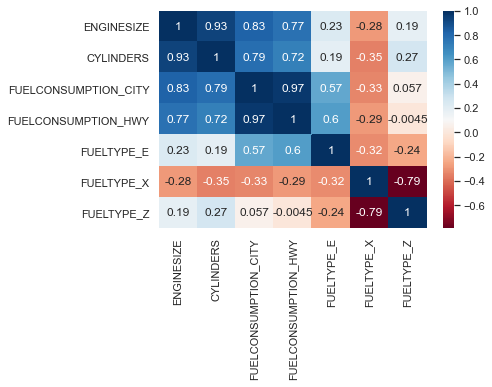

In [65]:
sns.heatmap(df[columns].corr(), annot =True, cmap='RdBu');

We need to drop the columns: ```ENGINESIZE, FUELCONSUMPTION_HWY``` as they are highly co-related with other columns. Let's drop these columns and check for co-relation again

In [66]:
df.drop(columns=['ENGINESIZE', 'FUELCONSUMPTION_HWY'], axis=0, inplace=True)

In [67]:
columns= ['CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELTYPE_E', 'FUELTYPE_X', 'FUELTYPE_Z']
columns

['CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELTYPE_E', 'FUELTYPE_X', 'FUELTYPE_Z']

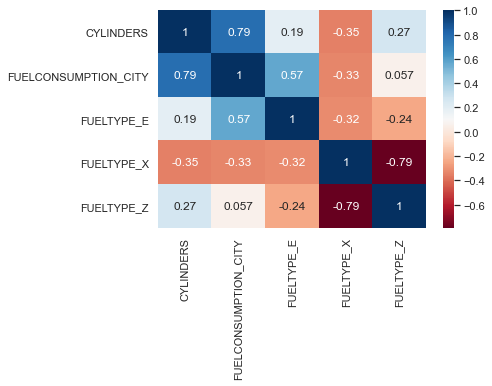

In [68]:
sns.heatmap(df[columns].corr(), annot =True, cmap='RdBu');

FUELCONSUMPTION_CITY just got saved by 0.01

**Thus assumption 2 is satisfied**

**Linear relationship between independent and dependent variable**

The target variable is ```CO2EMISSIONS```
The independent variables are: ```['CYLINDERS','FUELCONSUMPTION_CITY', 'FUELTYPE_E', 'FUELTYPE_X', 'FUELTYPE_Z']```

Let us check for linear relationship as under

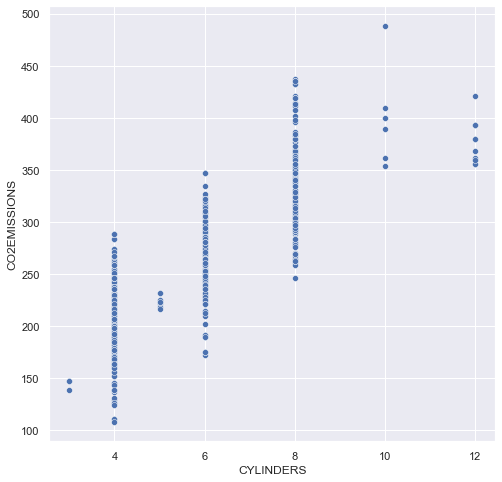

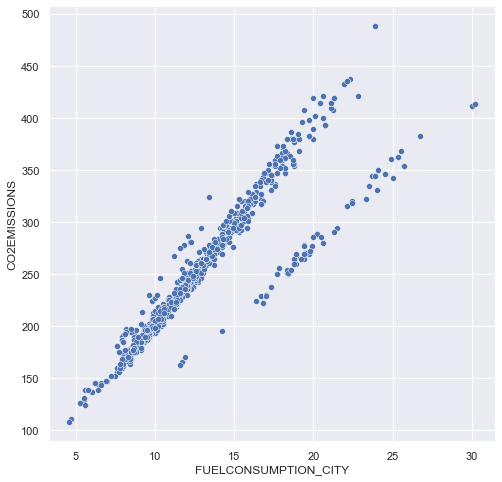

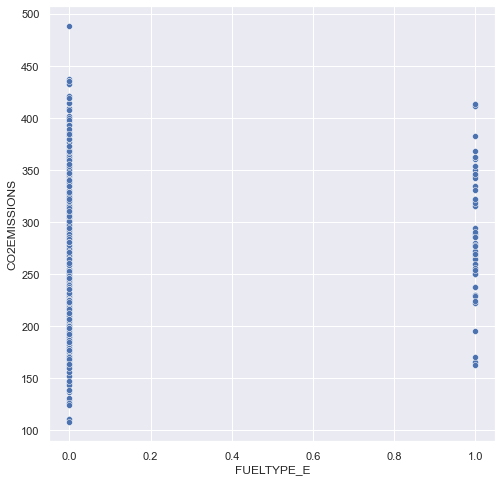

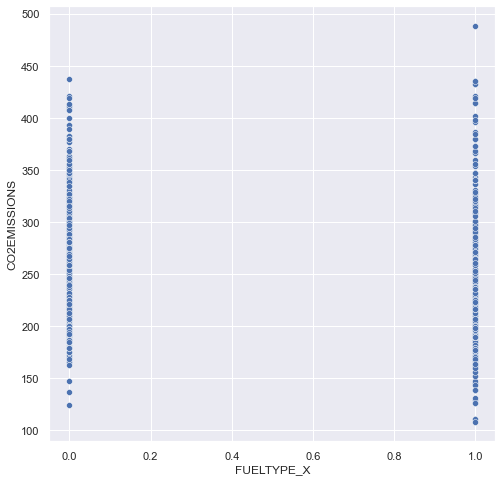

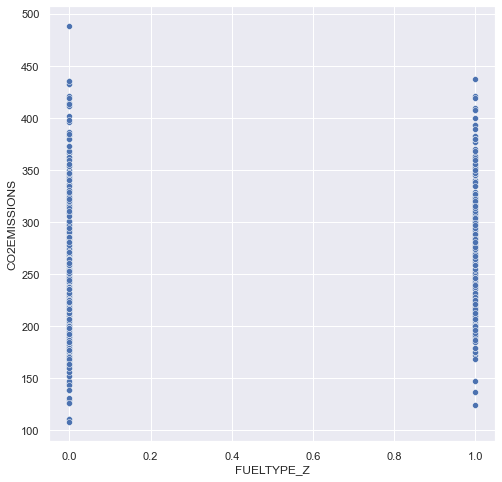

In [69]:
for col in columns:
    plt.figure(figsize=(8,8))
    sns.scatterplot(x=df[col],y=df['CO2EMISSIONS']);

**Thus assumption 3 is satisfied**

Since the first 3 assumptions are satisfied, we can assume that Homoscedasticity : constant variance assumption is automatically satisfied

## Train Test Split

In [70]:
features= ['CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELTYPE_E', 'FUELTYPE_X', 'FUELTYPE_Z']
features

['CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELTYPE_E', 'FUELTYPE_X', 'FUELTYPE_Z']

In [71]:
#We have the X and Y are as under;

X=df[features]
X.head()

,CYLINDERS,FUELCONSUMPTION_CITY,FUELTYPE_E,FUELTYPE_X,FUELTYPE_Z
0,4,9.9,0,0,1
1,4,11.2,0,0,1
2,4,6.0,0,0,1
3,6,12.7,0,0,1
4,6,12.1,0,0,1


In [72]:
y=df['CO2EMISSIONS']
y.head()

0    196
1    221
2    136
3    255
4    244
Name: CO2EMISSIONS, dtype: int64

In [73]:
print('Shape of X is :', X.shape)
print('Shape of y is :',y.shape)

Shape of X is : (952, 5)
Shape of y is : (952,)


In [74]:
#splitting the data into 80% train and 20% test

from sklearn.model_selection import train_test_split

def split(X,y):
    return train_test_split(X,y, test_size=0.2, random_state=1)

X_train, X_test, y_train, y_test=split(X,y)


In [75]:
print('Shape of X_train is :', X_train.shape)
print('Shape of y_train is :',y_train.shape)
print('Shape of X_test is :', X_test.shape)
print('Shape of y_test is :',y_test.shape)

Shape of X_train is : (761, 5)
Shape of y_train is : (761,)
Shape of X_test is : (191, 5)
Shape of y_test is : (191,)


## Data Scaling

We need to bring all the X columns  to have same uniformity. That is why we scale the data as under

In [76]:
#Scaling the X part of data
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler() # defining object
scalar.fit(X_train) #defining the scal
X_train_s=scalar.transform(X_train)#actual scaling
X_test_s=scalar.transform(X_test)


## Linear Regression

Now that all the assumptions are satisfied for linear regression,we are ready for our model development, let us develop our first model from linear regression model. Normally the model is defined as under;

### **Y=B0+B1X1+B2X2+B3X3+.........+BnXn

In [77]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(X_train_s, y_train) #calculates B0 and B1
y_pred_train_lg=linreg.predict(X_train_s)
y_pred_test_lg=linreg.predict(X_test_s)

In [78]:
#print b0 and b1
print('Intercept:',linreg.intercept_)          # print the intercept 
print('Coefficients:',linreg.coef_)  

Intercept: 132.8637950936449
Coefficients: [   6.5258  463.1036 -135.8914  -24.6541  -26.8691]


In [79]:
features

['CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELTYPE_E', 'FUELTYPE_X', 'FUELTYPE_Z']

In [80]:
features.insert(0,'Intercept')# Appending the columns to show the B values side by side
features

['Intercept',
 'CYLINDERS',
 'FUELCONSUMPTION_CITY',
 'FUELTYPE_E',
 'FUELTYPE_X',
 'FUELTYPE_Z']

In [81]:
coef = linreg.coef_.tolist()            
coef

[6.525825563100018,
 463.10356975405136,
 -135.89143333652146,
 -24.6541207255529,
 -26.8691022481095]

In [82]:
coef.insert(0, linreg.intercept_)  
coef

[132.8637950936449,
 6.525825563100018,
 463.10356975405136,
 -135.89143333652146,
 -24.6541207255529,
 -26.8691022481095]

In [83]:
eq1 = zip(features, coef)

for c1,c2 in eq1:
    print(c1,c2)

Intercept 132.8637950936449
CYLINDERS 6.525825563100018
FUELCONSUMPTION_CITY 463.10356975405136
FUELTYPE_E -135.89143333652146
FUELTYPE_X -24.6541207255529
FUELTYPE_Z -26.8691022481095


Therefore we have the final Linear regression equation as under;

**CO2 Emissions=132.86+6.52*X_train['CYLINDERS']+463.10*X_train['FUELCONSUMPTION_CITY']-135.89*X_train['FUELTYPE_E']-24.65*X_train['FUELTYPE_X']-26.87*X_train['FUELTYPE_Z']**

From the above linear regression equation, we have observed the following;
    - The CO2 Emissions are highly dependent on Fuel Consumption. For one unit increase in fuel consunption, 
the CO2 emissions increases by 463 counts.
    - The CO2 Emissions are also dependent on the number of engine cylinders. The CO2 emissions will get increased 
by 6 counts
    - The use of different type of fuel always tend to reduce the CO2 emissions. Basically the Fuel type E has very high effect on reducing the CO2 emissions as it recues the CO2 emissions by 136 counts


In [84]:
x_plot_train=132.86+6.52*X_train['CYLINDERS']+463.10*X_train['FUELCONSUMPTION_CITY']-135.89*X_train['FUELTYPE_E']-24.65*X_train['FUELTYPE_X']-26.87*X_train['FUELTYPE_Z']

### Plotting Predicted vs Actual

Let us plot the Predictd value with actual value and check the behaviour

PLotting for test data first

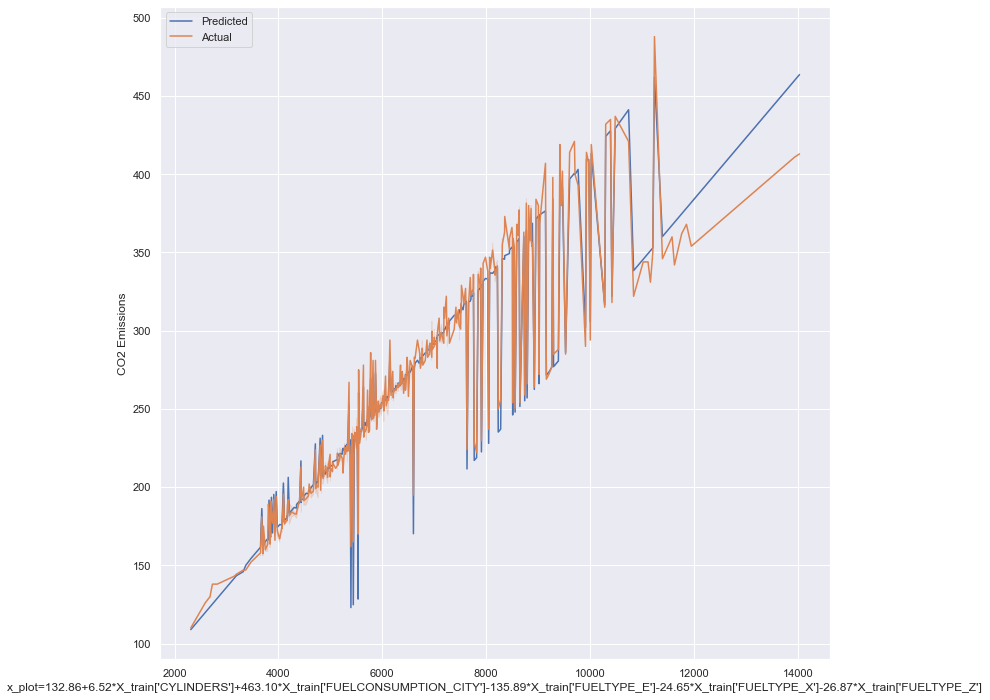

In [85]:
plt.figure(figsize=(12,12))
sns.lineplot(x=x_plot_train,y=y_pred_train_lg, label='Predicted')
sns.lineplot(x=x_plot_train,y=y_train, label='Actual')
plt.xlabel("x_plot=132.86+6.52*X_train['CYLINDERS']+463.10*X_train['FUELCONSUMPTION_CITY']-135.89*X_train['FUELTYPE_E']-24.65*X_train['FUELTYPE_X']-26.87*X_train['FUELTYPE_Z']")
plt.ylabel('CO2 Emissions')
plt.legend(loc='upper left')

Let us also check for linear behaviour of actual and predicted values for test data

Text(0, 0.5, 'Predicted CO2 Values')

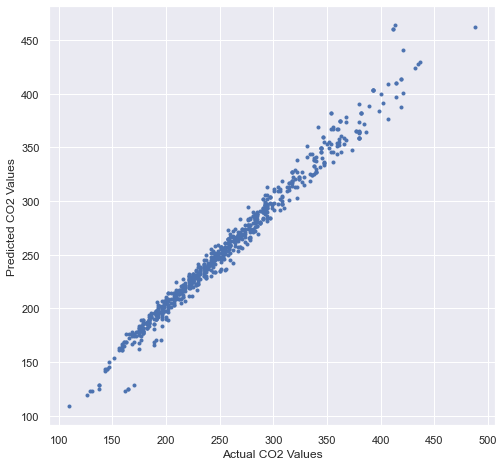

In [86]:
plt.figure(figsize=(8,8))
plt.axes(aspect='equal')
plt.scatter(y_train, y_pred_train_lg, marker='.')
plt.xlabel('Actual CO2 Values')
plt.ylabel('Predicted CO2 Values')

Now Let us check for the test dataset

In [87]:
x_plot_test=132.86+6.52*X_test['CYLINDERS']+463.10*X_test['FUELCONSUMPTION_CITY']-135.89*X_test['FUELTYPE_E']-24.65*X_test['FUELTYPE_X']-26.87*X_test['FUELTYPE_Z']

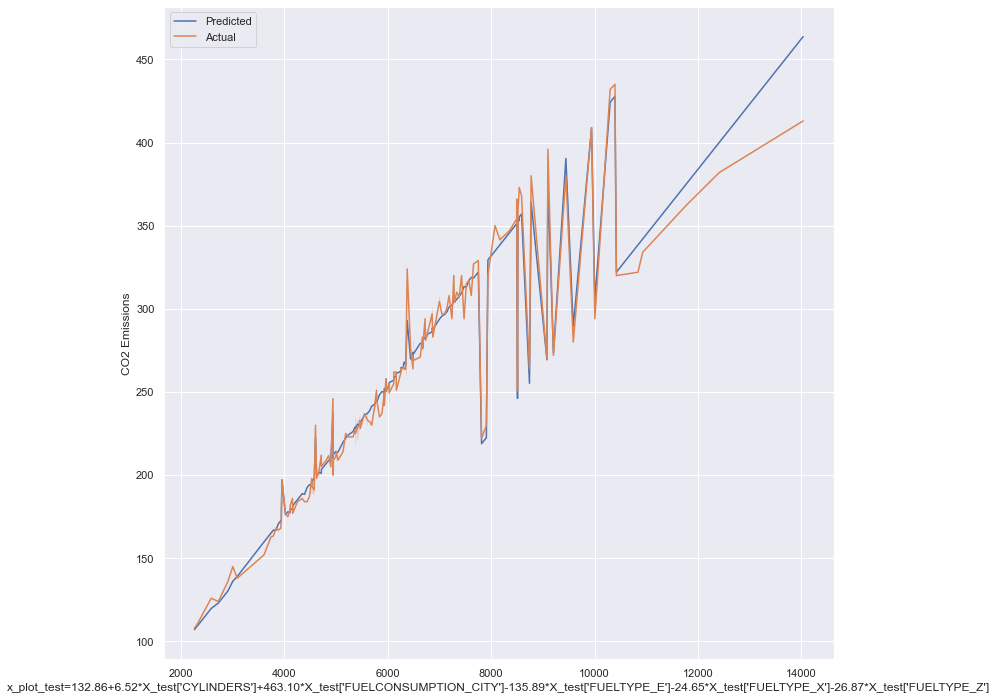

In [88]:
plt.figure(figsize=(12,12))
sns.lineplot(x=x_plot_test,y=y_pred_test_lg, label='Predicted')
sns.lineplot(x=x_plot_test,y=y_test, label='Actual')
plt.xlabel("x_plot_test=132.86+6.52*X_test['CYLINDERS']+463.10*X_test['FUELCONSUMPTION_CITY']-135.89*X_test['FUELTYPE_E']-24.65*X_test['FUELTYPE_X']-26.87*X_test['FUELTYPE_Z']")
plt.ylabel('CO2 Emissions')
plt.legend(loc='upper left')

Checcking for predicted vs actual for test dataset

Text(0, 0.5, 'Predicted CO2 Values')

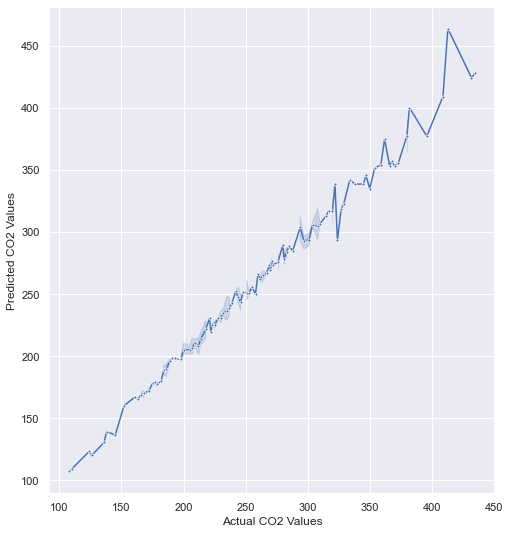

In [89]:
plt.figure(figsize=(8,22))
plt.axes(aspect='equal')
sns.lineplot(y_test, y_pred_test_lg, marker='.')
plt.xlabel('Actual CO2 Values')
plt.ylabel('Predicted CO2 Values')

From the above train and test plots its clear that the model is very good for predicting the CO2 Emissions

### FInding RMSE, R-squared and Adjusted R-squared

In [90]:
#finding RMSE values
from sklearn import metrics
RMSE_train_lg=np.sqrt(metrics.mean_squared_error(y_train,y_pred_train_lg))
print('the Root Mean Squared Error for Train data is  :',RMSE_train_lg)

the Root Mean Squared Error for Train data is  : 8.821916441033647


In [91]:
from sklearn import metrics
RMSE_test_lg=np.sqrt(metrics.mean_squared_error(y_test,y_pred_test_lg))
print('the Root Mean Squared Error for Test data is  :',RMSE_test_lg)

the Root Mean Squared Error for Test data is  : 8.22695172103769


In [92]:
from sklearn.metrics import r2_score
r2_train_lg=r2_score(y_train, y_pred_train_lg)
print('The R-square value for Train dataset is  :', r2_train_lg)

The R-square value for Train dataset is  : 0.9804954207149876


In [93]:
from sklearn.metrics import r2_score
r2_test_lg=r2_score(y_test, y_pred_test_lg)
print('The R-square value for Test dataset is  :', r2_test_lg)

The R-square value for Test dataset is  : 0.9832121945333532


#### Adjusted R-Square

Creating a function to calculate Adjusted R-square

In [94]:
def Adjusted_r2(r_square,N): #creating function so that we can call the function again and again
    return(1-(((1-r_square)*(N-1))/(N-6)))

In [95]:
adj_r2_train=Adjusted_r2(r2_train_lg,len(X_train))
print('The Adjusted R-square of Linear Regression Train Dataset is :', adj_r2_train)
adj_r2_test=Adjusted_r2(r2_test_lg,len(X_test))
print('The Adjusted R-square of Linear Regression Test Dataset is :', adj_r2_test)

The Adjusted R-square of Linear Regression Train Dataset is : 0.9803662513157492
The Adjusted R-square of Linear Regression Test Dataset is : 0.9827584700612817


In [96]:
X_train.shape[-1]

5

**From the above RMSE and R-squared values, we can say that the model is very accurate with the accuracy of 98% for train and test dataset**

## Summary of Linear Regression

We have the equation for linear regression for CO2 as ;

**CO2 Emissions=132.86+6.52*X_train['CYLINDERS']+463.10*X_train['FUELCONSUMPTION_CITY']-135.89*X_train['FUELTYPE_E']-24.65*X_train['FUELTYPE_X']-26.87*X_train['FUELTYPE_Z']**

From the above linear regression equation, we have observed the following;
   - The CO2 Emissions are highly dependent on Fuel Consumption. For one unit increase in fuel consunption, the CO2 emissions increases by 463 counts.
   - The CO2 Emissions are also dependent on the number of engine cylinders. The CO2 emissions will get increased by 6 counts
   - The use of different type of fuel always tend to reduce the CO2 emissions. Basically the Fuel type E has very high effect on reducing the CO2 emissions as it recues the CO2 emissions by 136 counts

After evaluating this model, we have the following results

|RMSE Score Train||RMSE Score Test ||R-square Value Train||R-square Value Test|| Adjusted R-squared Value Train||Adjusted R-squared Value test|
|------------||-------------||------||-------------||-----------||---------|
| 8.8219  ||8.2269|| 0.9804   ||0.9832|| 0.9803||   0.9827|



## Decision Tree

### Decision Tree Model 1

In [97]:
# Importing and developing simple Decision Tree Model
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(criterion='mse')
model.fit(X_train_s, y_train)

DecisionTreeRegressor()

In [98]:
y_train_pred_dt=model.predict(X_train_s)
y_test_pred_dt=model.predict(X_test_s)

Text(0, 0.5, 'Predicted')

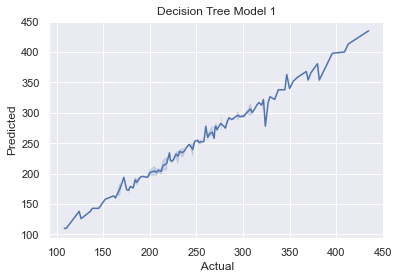

In [99]:
sns.lineplot(x=y_test, y=y_test_pred_dt)
plt.title('Decision Tree Model 1')
plt.xlabel(' Actual')
plt.ylabel('Predicted')

### Finding out RMSE and Adjusted R-squared for Train and Test Linear Regression Model

In [100]:
#finding RMSE values
from sklearn import metrics
RMSE_train_dt=np.sqrt(metrics.mean_squared_error(y_train,y_train_pred_dt))
print('The RMSE Value of Train Dataset for Simple Decision Tree Model is  :',RMSE_train_dt)

The RMSE Value of Train Dataset for Simple Decision Tree Model is  : 3.5162749845560994


In [104]:
#finding RMSE values
RMSE_test_dt=np.sqrt(metrics.mean_squared_error(y_test,y_test_pred_dt))
print('The RMSE Value of Test Dataset for Simple Decision Tree Model is  :',RMSE_test_dt)

The RMSE Value of Test Dataset for Simple Decision Tree Model is  : 8.109936912660084


In [105]:
from sklearn.metrics import r2_score
r2_dt_train=r2_score(y_train, y_train_pred_dt)
print('The R-square value for Train Data of simple Decision Tree Model is :', r2_dt_train)

r2_dt_test=r2_score(y_test, y_test_pred_dt)
print('The R-square value for Test Data of simple Decision Tree Model is :', r2_dt_test)

The R-square value for Train Data of simple Decision Tree Model is : 0.9969013225678306
The R-square value for Test Data of simple Decision Tree Model is : 0.9836863559425487


In [106]:
adj_r2_train=Adjusted_r2(r2_dt_train,len(X_train))
print('The Adjusted R-square of Decision Tree first model Train Dataset is :', adj_r2_train)
adj_r2_test=Adjusted_r2(r2_dt_test,len(X_test))
print('The Adjusted R-square of Decision Tree first model Test Dataset is :', adj_r2_test)

The Adjusted R-square of Decision Tree first model Train Dataset is : 0.9968808015252334
The Adjusted R-square of Decision Tree first model Test Dataset is : 0.9832454466436987


### Decision Tree Model 2

Let us slightly change few parameters of Model1 and see if we can get better results

In [107]:
from sklearn.tree import DecisionTreeRegressor
model2 = DecisionTreeRegressor( criterion='mse', max_depth=7,
                               max_features=None, max_leaf_nodes=None,
                               min_impurity_decrease=0.0, min_impurity_split=None,
                               min_samples_leaf=1, min_samples_split=2,
                               min_weight_fraction_leaf=0.0, presort=False,
                               random_state=None, splitter='best')
model2.fit(X_train_s, y_train)

#random state is a seed to start finding something randomly

DecisionTreeRegressor(max_depth=7, presort=False)

In [108]:
y_train_pred_dt_m2=model2.predict(X_train_s)
y_test_pred_dt_m2=model2.predict(X_test_s)

### Finding out RMSE and Adjusted R-squared for Train and Test Linear Regression Model

In [109]:
#finding RMSE values
from sklearn import metrics
RMSE_train_dt_m2=np.sqrt(metrics.mean_squared_error(y_train,y_train_pred_dt_m2))
print('The RMSE score of Train Dataset of Decision Tree Model 2 is :',RMSE_train_dt_m2)

The RMSE score of Train Dataset of Decision Tree Model 2 is : 5.954048895201773


In [110]:
#finding RMSE values
from sklearn import metrics
RMSE_test_dt_m2=np.sqrt(metrics.mean_squared_error(y_test,y_test_pred_dt_m2))
print('The RMSE score of Test Dataset of Decision Tree Model 2 is :',RMSE_test_dt_m2)

The RMSE score of Test Dataset of Decision Tree Model 2 is : 8.483951808792773


In [111]:
from sklearn.metrics import r2_score
r2_dt_m2_train=r2_score(y_train, y_train_pred_dt_m2)
print('The R-square value of Train Dataset of Decision Tree Model 2 is :',r2_dt_m2_train)

r2_dt_m2_test=r2_score(y_test, y_test_pred_dt_m2)
print('The R-square value of Test Dataset of Decision Tree Model 2 is :',r2_dt_m2_test)

The R-square value of Train Dataset of Decision Tree Model 2 is : 0.9911154486722623
The R-square value of Test Dataset of Decision Tree Model 2 is : 0.9821469501957191


In [112]:
adj_r2_train=Adjusted_r2(r2_dt_m2_train,len(X_train))
print('The Adjusted R-square of Decisiom Tree Train Dataset for the second model is :', adj_r2_train)
adj_r2_test=Adjusted_r2(r2_dt_m2_test,len(X_test))
print('The Adjusted R-square of Decision Tree Test Dataset for the second model is :', adj_r2_test)

The Adjusted R-square of Decisiom Tree Train Dataset for the second model is : 0.9910566105839992
The Adjusted R-square of Decision Tree Test Dataset for the second model is : 0.9816644353361439


## Decision Tree GridSearchCV Model

In [113]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

decision_tree_regressor= DecisionTreeRegressor(random_state = 0)

max_depth = list(range(2, 60))
max_depth.append('None')

tree_para = [{'max_depth': max_depth,
              'splitter' : ["best", "random"],
              'max_features': ["auto", "log2"] }]
                            
                            

grid_search = GridSearchCV(decision_tree_regressor,tree_para, cv=10, refit='AUC')
grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=0),
             param_grid=[{'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                        14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                        24, 25, 26, 27, 28, 29, 30, 31, ...],
                          'max_features': ['auto', 'log2'],
                          'splitter': ['best', 'random']}],
             refit='AUC')

In [114]:
model3 = grid_search.best_estimator_

In [115]:
y_train_pred_dt3 = model3.predict(X_train_s)
y_test_pred_dt3 = model3.predict(X_test_s)

### FInding out RMSE and Adjusted R-squared for Train and Test Linear Regression Model

In [117]:
#finding RMSE values
from sklearn import metrics
RMSE_train_dt_m3=np.sqrt(metrics.mean_squared_error(y_train,y_train_pred_dt3))
print('The RMSE value of Train dataset for Decision Tree Grid Search Model is :',RMSE_train_dt_m3)

#finding RMSE values
RMSE_test_dt_m3=np.sqrt(metrics.mean_squared_error(y_test,y_test_pred_dt3))
print('The RMSE value of Test dataset for Decision Tree Grid Search Model is :',RMSE_test_dt_m3)

The RMSE value of Train dataset for Decision Tree Grid Search Model is : 3.6269251570753847
The RMSE value of Test dataset for Decision Tree Grid Search Model is : 7.686317843797969


In [118]:
from sklearn.metrics import r2_score
r2_m3_train=r2_score(y_train, y_train_pred_dt3)
print('The R-square value of Train dataset for Decision Tree Grid Search Model is :',r2_m3_train)

r2_m3_test=r2_score(y_test, y_test_pred_dt3)
print('The R-square value of Test dataset for Decision Tree Grid Search Model is :',r2_m3_test)

The R-square value of Train dataset for Decision Tree Grid Search Model is : 0.9967032357291271
The R-square value of Test dataset for Decision Tree Grid Search Model is : 0.9853461173461516


In [119]:
adj_r2_train=Adjusted_r2(r2_m3_train,len(X_train))
print('The Adjusted R-square of Decision Tree GridSearch model Train Dataset for the second model is :', adj_r2_train)
adj_r2_test=Adjusted_r2(r2_m3_test,len(X_test))
print('The Adjusted R-square of Decision Tree Test GridSearch model Test Dataset for the second model is :', adj_r2_test)

The Adjusted R-square of Decision Tree GridSearch model Train Dataset for the second model is : 0.9966814028531611
The Adjusted R-square of Decision Tree Test GridSearch model Test Dataset for the second model is : 0.9849500664636152


## Summary of Decision Tree

The summary of the 3 Decision Tree Models we have for the train and test dataset details as under

|Model Name||RMSE Score Train||RMSE Score Test ||R-square Value Train||R-square Value Test||Adjusted R-squared Train||Adjusted R-square Test|
|---------||------------||-------------||------||-------------||--------||--------|
|Decision Tree Moidel-1|| 3.5162  ||8.3830|| 0.9969   ||0.9825||0.9968||0.9819|
|Decision Tree Model-2|| 5.9540  ||8.4839|| 0.9911    ||0.9821||0.9910||0.9819|
|GridSearchCV Model|| 3.6269 ||7.6863||  0.9967  ||0.9853|| 0.9966||0.9849|


**Based on the R2 Score for test data, we can say that Decision Tree GridSearchCV model is the best model**

## Random Forest Regressor

### Random Forest Model 1

In [120]:
from sklearn.ensemble import RandomForestRegressor
model_rf1 = RandomForestRegressor(random_state = 0)
model_rf1.fit(X_train_s, y_train)

RandomForestRegressor(random_state=0)

In [121]:
y_pred_train_rf1 = model_rf1.predict(X_train_s)
y_pred_test_rf1 = model_rf1.predict(X_test_s)

### FInding out RMSE and Adjusted R-squared for Train and Test Linear Regression Model

In [129]:
#finding RMSE values
from sklearn import metrics
RMSE_train_rf1=np.sqrt(metrics.mean_squared_error(y_train,y_pred_train_rf1))
RMSE_test_rf1=np.sqrt(metrics.mean_squared_error(y_test,y_pred_test_rf1))
print('RMSE of Random Forest Model 1 for train dataset : ',RMSE_train_rf1)
print('RMSE of Random Forest Model 1 for test dataset : ',RMSE_test_rf1)

#R-Squared
from sklearn.metrics import r2_score
r2_rf1_train=r2_score(y_train, y_pred_train_rf1)
r2_rf1_test=r2_score(y_test, y_pred_test_rf1)
print('The R-square Value of train dataset of Simple Random Forest Model is :',r2_rf1_train)
print('The R-square Value of test dataset of Simple Random Forest Model is :',r2_rf1_test)


RMSE of Random Forest Model 1 for train dataset :  4.240950227529691
RMSE of Random Forest Model 1 for test dataset :  7.996334987332707
The R-square Value of train dataset of Simple Random Forest Model is : 0.9954924862706905
The R-square Value of test dataset of Simple Random Forest Model is : 0.9841401896499649


In [125]:
adj_r2_train=Adjusted_r2(r2_rf1_train,len(X_train))
print('The Adjusted R-square of Random Forest Train Dataset for the first model is :', adj_r2_train)
adj_r2_test=Adjusted_r2(r2_rf1_test,len(X_test))
print('The Adjusted R-square of Random Forest Test Dataset for the first model is :', adj_r2_test)

The Adjusted R-square of Random Forest Train Dataset for the first model is : 0.9954626351863904
The Adjusted R-square of Random Forest Test Dataset for the first model is : 0.983711546126991


### Random Forest Model 2

In [126]:
model_rf2 = RandomForestRegressor(random_state = 0,
                                n_estimators = 15,
                                min_samples_split = 2,
                                min_samples_leaf = 1)

model_rf2.fit(X_train_s, y_train)

RandomForestRegressor(n_estimators=15, random_state=0)

In [127]:
y_pred_train_rf2 = model_rf2.predict(X_train_s)
y_pred_test_rf2 = model_rf2.predict(X_test_s)

<a id=section823></a>
### FInding out RMSE and Adjusted R-squared for Train and Test Linear Regression Model

In [128]:
#finding RMSE values
from sklearn import metrics
RMSE_train_rf2=np.sqrt(metrics.mean_squared_error(y_train,y_pred_train_rf2))
RMSE_test_rf2=np.sqrt(metrics.mean_squared_error(y_test,y_pred_test_rf2))
print('RMSE value of Random Forest model 2 for train dataset is : ',RMSE_train_rf2)
print('RMSE value of Random Forest model 2 for test dataset is : ',RMSE_test_rf2)

RMSE value of Random Forest model 2 for train dataset is :  4.391458058801435
RMSE value of Random Forest model 2 for test dataset is :  8.016600149547628


In [130]:
#R-Squared
from sklearn.metrics import r2_score
r2_rf2_train=r2_score(y_train, y_pred_train_rf2)
r2_rf2_test=r2_score(y_test, y_pred_test_rf2)
print('The R-square value of train dataset of Random Forest 2nd Model is :',r2_rf2_train)
print('The R-square value of test dataset of Random Forest 2nd Model is :',r2_rf2_test)

The R-square value of train dataset of Random Forest 2nd Model is : 0.9951668732389738
The R-square value of test dataset of Random Forest 2nd Model is : 0.984059700552137


In [131]:
adj_r2_train=Adjusted_r2(r2_rf2_train,len(X_train))
print('The Adjusted R-square of Random Forest Train Dataset for the second model is :', adj_r2_train)
adj_r2_test=Adjusted_r2(r2_rf2_test,len(X_test))
print('The Adjusted R-square of Random Forest Test Dataset for the second model is :', adj_r2_test)

The Adjusted R-square of Random Forest Train Dataset for the second model is : 0.9951348657769803
The Adjusted R-square of Random Forest Test Dataset for the second model is : 0.9836288816481407


### Random Forest Model 3

In [133]:
#Using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
# parameters for GridSearchCV

max_depth = list(range(2, 60))
max_depth.append('None')

# specify parameters and distributions to sample from
param_dist = {"max_depth": max_depth,
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "n_estimators": [100, 400, 700, 1000, 1500],
              'max_features': ["auto", "log2"]
             }
# run randomized search
n_iter_search = 50
random_search = RandomizedSearchCV(model_rf1, param_distributions = param_dist,
                                   n_iter = n_iter_search,
                                   n_jobs = -1)

In [134]:
random_search.fit(X_train_s, y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(random_state=0), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, 31, ...],
                                        'max_features': ['auto', 'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000232D4D090D0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000232D4D093D0>,
                                        'n_estimators': [100, 400, 700, 1000,
                                                         1500]})

In [135]:
model_rf3 = random_search.best_estimator_

In [136]:
y_pred_test_rf3 = model_rf3.predict(X_test_s)
y_pred_train_rf3=model_rf3.predict(X_train_s)

### FInding out RMSE and Adjusted R-squared for Train and Test Linear Regression Model

In [137]:
#finding RMSE values
from sklearn import metrics
RMSE_train_rf3=np.sqrt(metrics.mean_squared_error(y_train,y_pred_train_rf3))
RMSE_test_rf3=np.sqrt(metrics.mean_squared_error(y_test,y_pred_test_rf3))
print('RMSE value of Random Forest model 3 for train dataset is : ',RMSE_train_rf3)
print('RMSE value of Random Forest model 3 for test dataset is : ',RMSE_test_rf3)

#R-Squared
from sklearn.metrics import r2_score
r2_rf3_train=r2_score(y_train, y_pred_train_rf3)
r2_rf3_test=r2_score(y_test, y_pred_test_rf3)
print('The R-square Value of train dataset of Random Forest 3rd Model is :',r2_rf3_train)
print('The R-square Value of test dataset of Random Forest 3rd Model is :',r2_rf3_test)

RMSE value of Random Forest model 3 for train dataset is :  4.688774744063553
RMSE value of Random Forest model 3 for test dataset is :  9.190332953260455
The R-square Value of train dataset of Random Forest 3rd Model is : 0.9944902810609235
The R-square Value of test dataset of Random Forest 3rd Model is : 0.9790502655795369


In [138]:
adj_r2_train=Adjusted_r2(r2_rf3_train,len(X_train))
print('The Adjusted R-square of Random Forest Train Dataset for the Randomized Search model is :', adj_r2_train)
adj_r2_test=Adjusted_r2(r2_rf3_test,len(X_test))
print('The Adjusted R-square of Random Forest Test Dataset for the Randomized Search model is :', adj_r2_test)

The Adjusted R-square of Random Forest Train Dataset for the Randomized Search model is : 0.994453792856029
The Adjusted R-square of Random Forest Test Dataset for the Randomized Search model is : 0.978484056541146


### Summary of Random Forest

The summary of the 3 Random Forest Models we have the test dataset are as under;

|Model Name||RMSE Score Train||RMSE Score test||R-square Value train|| R-square value test||Adjusted R-squared Train||Adjusted R-squared test|
|---------||------------||-------------||----------||-------------||-------||------|
|Random Forest Model-1||  4.2409  ||7.9963||  0.9954      ||0.9841||0.9954||0.9837|
|Random Forest Mode2-2|| 4.3914    ||8.0166||  0.9951      ||0.9840||0.9951||0.9836|
|RandomizedSearchCV Model||  4.0816 ||88103||   0.9958    ||0.9807||0.9957||0.9802|


## Conclusion

To sum up, we have developed a total of 7 models under Linear Regression, Decision Tree and Random Forest. We trained these models with our train dataset and tested each models with our test dataset. Each model gave us excellent results with an accuracy of >97%.

The RMSE and R2 Score for each models for train and test datasets are as under;

|Sl. No.|| Model Name || RMSE Score Test || R-square Value test || Adjusted R-squared test|
|----||---------||------------||-------------||----------|
|1|| Linear Regression Model|| 8.2269||0.9832||0.9827|
|2|| Decision Tree Model-1|| 8.3830||0.9825||0.9820|
|3|| Decision Tree Model-2|| 8.4839||0.9821||0.9816|
|4|| GridSearchCV Model|| 7.6863||0.9853||0.9849|
|5|| Random Forest Model-1|| 7.9963||0.9841||0.9837|
|6|| Random Forest Model-2||8.0166||0.9840||0.9836|
|7|| Randomized Search Model||8.8103||0.9807||0.9802|

**Therefore based on R2 score, GridSearchCV- model is the best model for this dataset**